# Projet Machine Learning

## Visualisation

Afficher les 10 premières lignes du set de données

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [121]:
housing = pd.read_csv('D_train.csv')
housing.head(n=10)

index                           MS_SubClass                   MS_Zoning  \
0    136   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
1    947  One_and_Half_Story_Finished_All_Ages     Residential_Low_Density   
2    280   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
3   1572   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
4   1585              Two_Story_1946_and_Newer     Residential_Low_Density   
5   1429   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
6   1483          One_Story_PUD_1946_and_Newer  Residential_Medium_Density   
7   2797              Two_Story_1946_and_Newer     Residential_Low_Density   
8   1254   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
9    838              Two_Story_1946_and_Newer     Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley             Lot_Shape  \
0             0     19900   Pave  No_Alley_Access               Regular   
1            48     12822   Pave  No_Alley_Access    Slightly_Irregular   
2            64      6410   Pave  No_Alley_Access               Regular   
3             0     15498   Pave  No_Alley_Access    Slightly_Irregular   
4            85     12244   Pave  No_Alley_Access               Regular   
5             0     11500   Pave  No_Alley_Access    Slightly_Irregular   
6             0      4438   Pave  No_Alley_Access               Regular   
7             0     21533   Pave  No_Alley_Access  Moderately_Irregular   
8            60     10122   Pave  No_Alley_Access               Regular   
9            43     10667   Pave  No_Alley_Access  Moderately_Irregular   

  Land_Contour Utilities  ... Pool_Area  Pool_QC            Fence  \
0          Lvl    AllPub  ...         0  No_Pool         No_Fence   
1          Lvl    AllPub  ...         0  No_Pool         No_Fence   
2          HLS    AllPub  ...         0  No_Pool  Minimum_Privacy   
3          Lvl    AllPub  ...         0  No_Pool         No_Fence   
4          Lvl    AllPub  ...         0  No_Pool         No_Fence   
5          Bnk    AllPub  ...         0  No_Pool         No_Fence   
6          Lvl    AllPub  ...         0  No_Pool         No_Fence   
7          Lvl    AllPub  ...         0  No_Pool         No_Fence   
8          Lvl    AllPub  ...         0  No_Pool     Good_Privacy   
9          Lvl    AllPub  ...         0  No_Pool         No_Fence   

  Misc_Feature  Misc_Val  Mo_Sold Year_Sold Sale_Type Sale_Condition  y  
0         None         0        7      2010       WD          Normal  C  
1         None         0        8      2009       WD         Abnorml  B  
2         None         0        5      2010       WD          Normal  E  
3         None         0        5      2008       COD        Abnorml  A  
4         None         0        8      2008       WD          Normal  A  
5         None         0        3      2008       WD          Normal  C  
6         None         0        1      2008       WD          Normal  D  
7         None         0        8      2006       WD          Normal  B  
8         None         0        8      2008       WD          Normal  E  
9         None         0        4      2009     ConLw         Normal  B  

[10 rows x 60 columns]

Séparer le set de données en X et y

In [122]:
X_train = housing.drop(["index", "y"], axis = 1)
y_train = housing.y
X_train.head(10)

MS_SubClass                   MS_Zoning  \
0   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
1  One_and_Half_Story_Finished_All_Ages     Residential_Low_Density   
2   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
3   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
4              Two_Story_1946_and_Newer     Residential_Low_Density   
5   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
6          One_Story_PUD_1946_and_Newer  Residential_Medium_Density   
7              Two_Story_1946_and_Newer     Residential_Low_Density   
8   One_Story_1946_and_Newer_All_Styles     Residential_Low_Density   
9              Two_Story_1946_and_Newer     Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley             Lot_Shape  \
0             0     19900   Pave  No_Alley_Access               Regular   
1            48     12822   Pave  No_Alley_Access    Slightly_Irregular   
2            64      6410   Pave  No_Alley_Access               Regular   
3             0     15498   Pave  No_Alley_Access    Slightly_Irregular   
4            85     12244   Pave  No_Alley_Access               Regular   
5             0     11500   Pave  No_Alley_Access    Slightly_Irregular   
6             0      4438   Pave  No_Alley_Access               Regular   
7             0     21533   Pave  No_Alley_Access  Moderately_Irregular   
8            60     10122   Pave  No_Alley_Access               Regular   
9            43     10667   Pave  No_Alley_Access  Moderately_Irregular   

  Land_Contour Utilities Bldg_Type  ... Screen_Porch Pool_Area  Pool_QC  \
0          Lvl    AllPub    OneFam  ...            0         0  No_Pool   
1          Lvl    AllPub    OneFam  ...          198         0  No_Pool   
2          HLS    AllPub    OneFam  ...            0         0  No_Pool   
3          Lvl    AllPub    OneFam  ...            0         0  No_Pool   
4          Lvl    AllPub    OneFam  ...            0         0  No_Pool   
5          Bnk    AllPub    OneFam  ...            0         0  No_Pool   
6          Lvl    AllPub    TwnhsE  ...            0         0  No_Pool   
7          Lvl    AllPub    OneFam  ...            0         0  No_Pool   
8          Lvl    AllPub    OneFam  ...            0         0  No_Pool   
9          Lvl    AllPub    OneFam  ...            0         0  No_Pool   

             Fence  Misc_Feature Misc_Val Mo_Sold Year_Sold Sale_Type  \
0         No_Fence          None        0       7      2010       WD    
1         No_Fence          None        0       8      2009       WD    
2  Minimum_Privacy          None        0       5      2010       WD    
3         No_Fence          None        0       5      2008       COD   
4         No_Fence          None        0       8      2008       WD    
5         No_Fence          None        0       3      2008       WD    
6         No_Fence          None        0       1      2008       WD    
7         No_Fence          None        0       8      2006       WD    
8     Good_Privacy          None        0       8      2008       WD    
9         No_Fence          None        0       4      2009     ConLw   

  Sale_Condition  
0         Normal  
1        Abnorml  
2         Normal  
3        Abnorml  
4         Normal  
5         Normal  
6         Normal  
7         Normal  
8         Normal  
9         Normal  

[10 rows x 58 columns]

Afficher les noms des colonnes et leurs types

In [123]:
X_train.dtypes

MS_SubClass       object
MS_Zoning         object
Lot_Frontage       int64
Lot_Area           int64
Street            object
Alley             object
Lot_Shape         object
Land_Contour      object
Utilities         object
Bldg_Type         object
House_Style       object
Overall_Qual      object
Overall_Cond      object
Year_Built         int64
Year_Remod_Add     int64
Roof_Style        object
Exter_Qual        object
Exter_Cond        object
Foundation        object
Bsmt_Qual         object
Bsmt_Cond         object
Bsmt_Exposure     object
Bsmt_Unf_SF        int64
Total_Bsmt_SF      int64
Heating           object
Heating_QC        object
Central_Air       object
Electrical        object
First_Flr_SF       int64
Second_Flr_SF      int64
Gr_Liv_Area        int64
Bsmt_Full_Bath     int64
Full_Bath          int64
Bedroom_AbvGr      int64
Kitchen_AbvGr      int64
Kitchen_Qual      object
TotRms_AbvGrd      int64
Functional        object
Fireplaces         int64
Fireplace_Qu      object


Construire un PairPlot

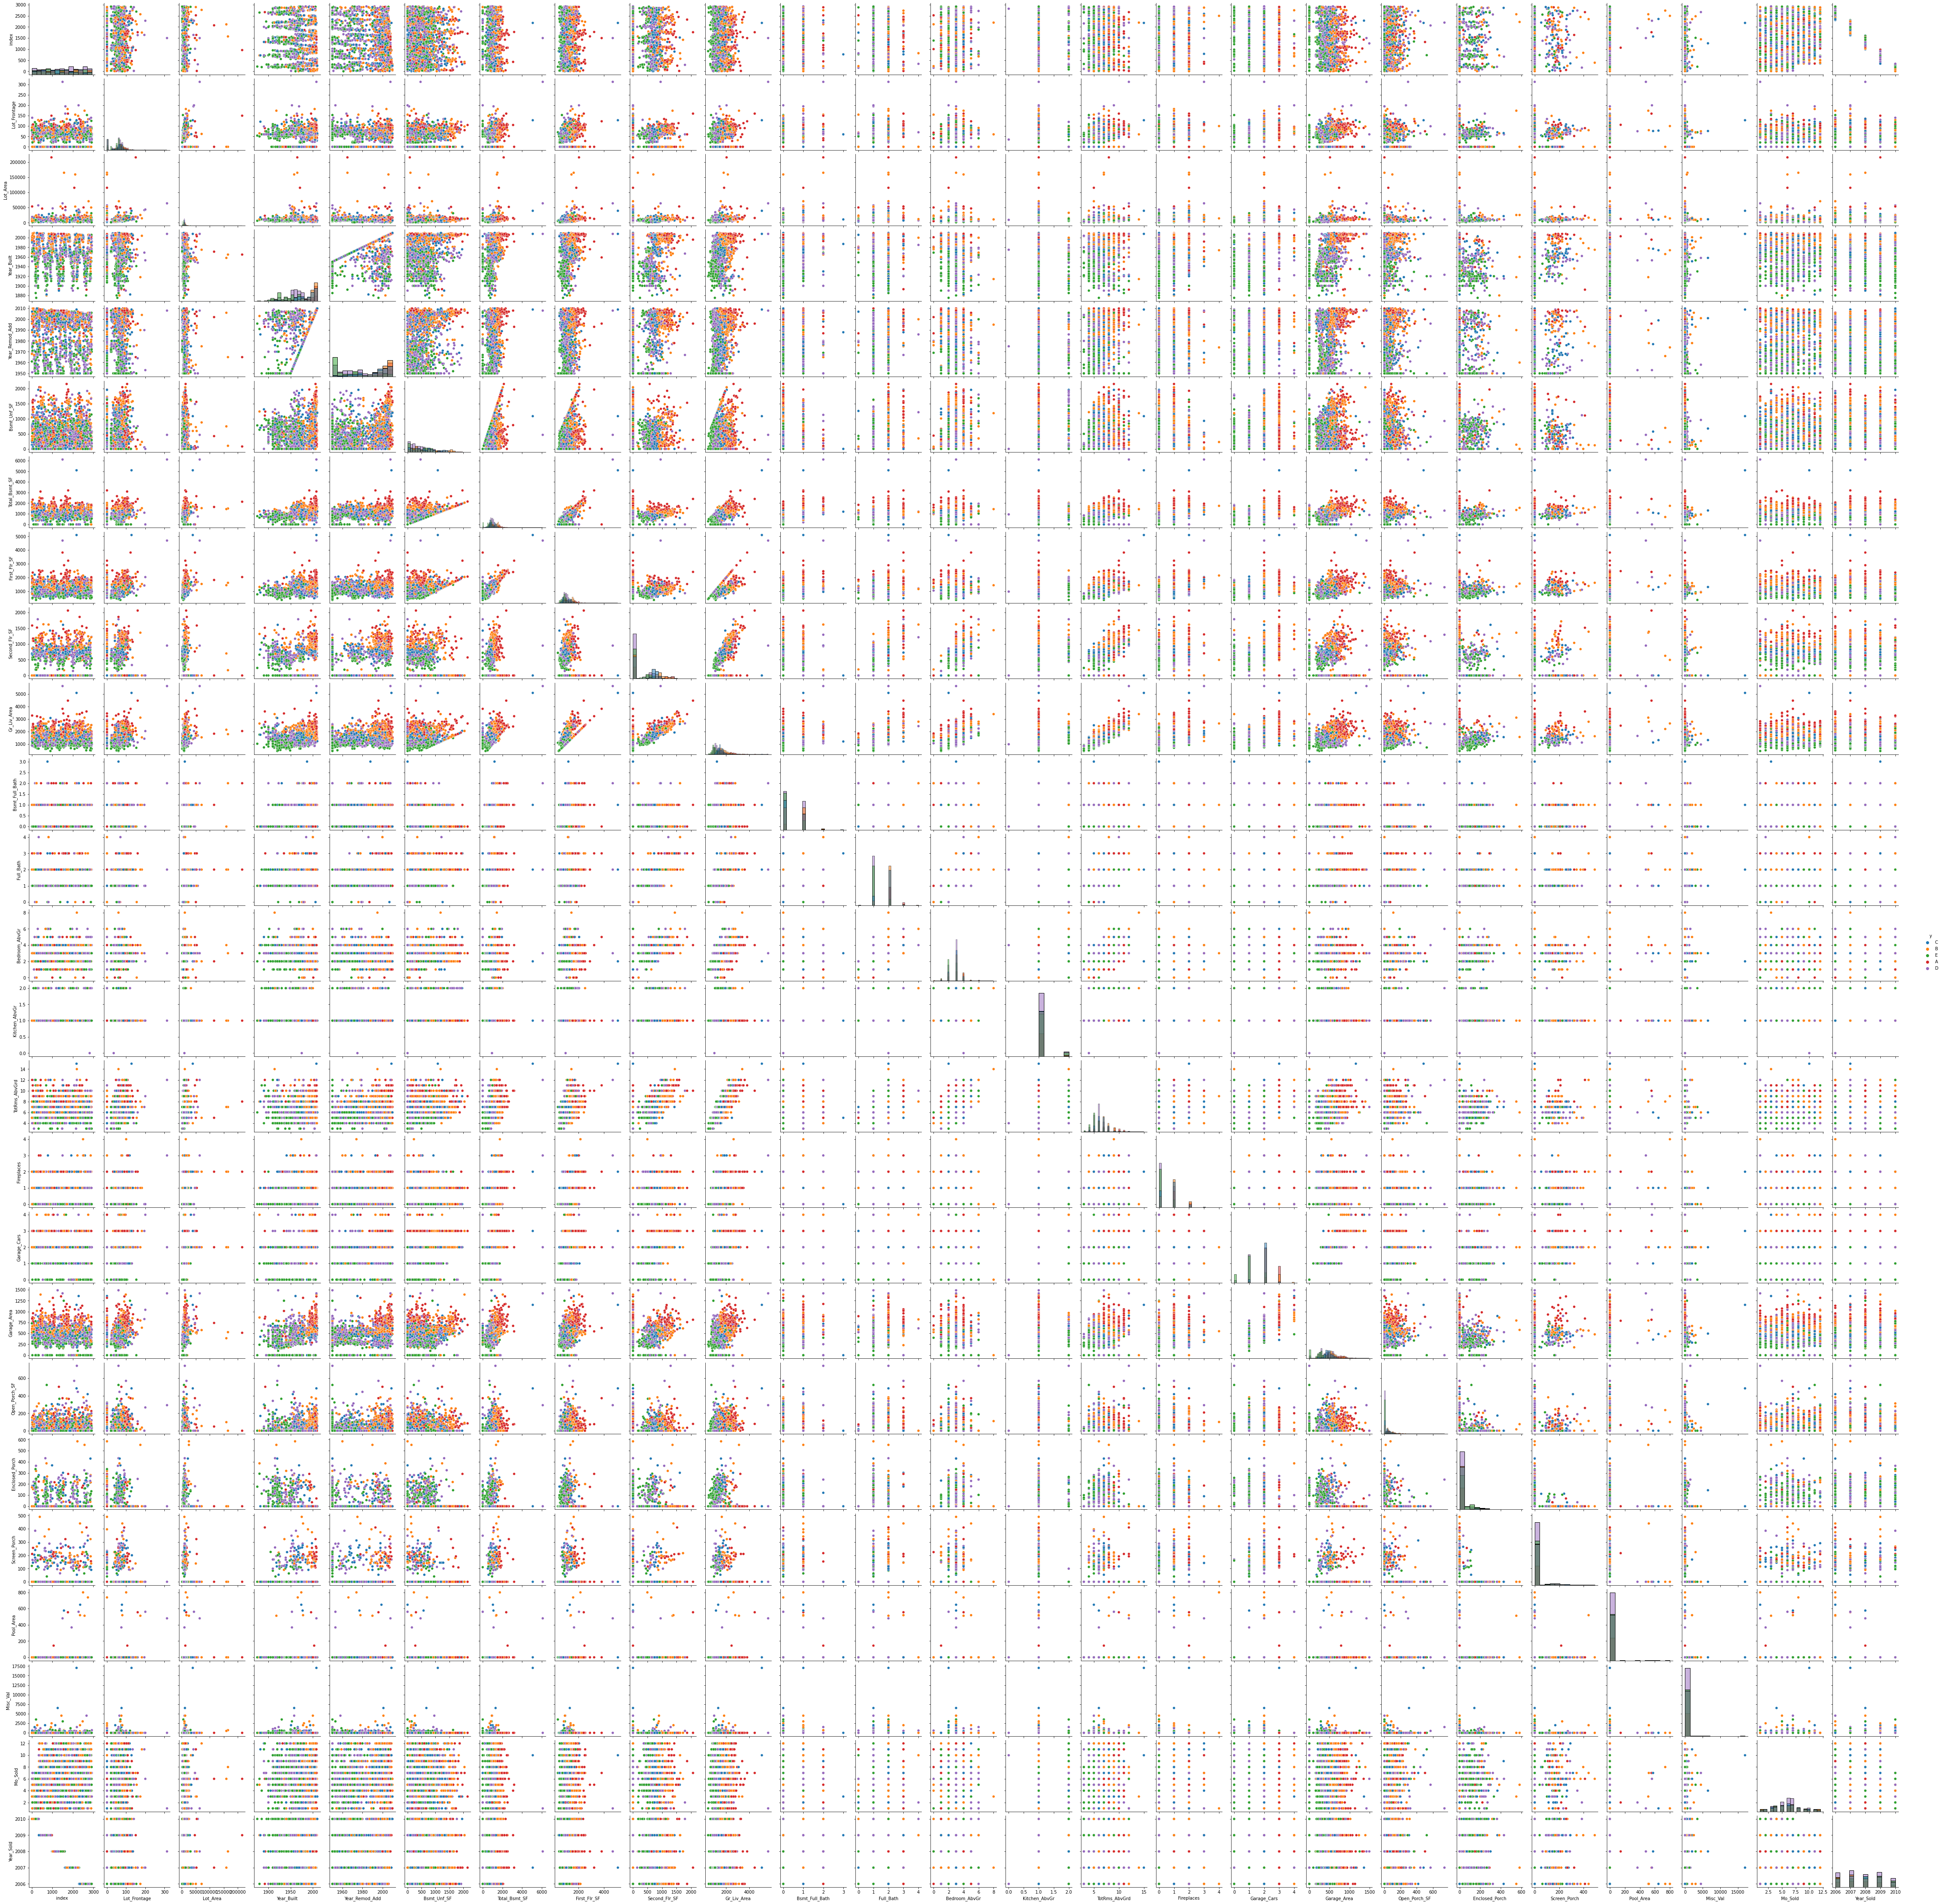

In [124]:
sns.pairplot(housing, hue="y", diag_kind="hist")

Calculer la matrice de correlation des variables

In [125]:
correlation = X_train.corr()
correlation.style.background_gradient()

Ouvrir le fichier test

In [126]:
housing_test = pd.read_csv('X_test.csv')
housing_test.head(10)

index                           MS_SubClass                     MS_Zoning  \
0   1476              Two_Story_1946_and_Newer       Residential_Low_Density   
1    781  One_and_Half_Story_Finished_All_Ages       Residential_Low_Density   
2   2374   One_Story_1946_and_Newer_All_Styles       Residential_Low_Density   
3    270   One_Story_1946_and_Newer_All_Styles       Residential_Low_Density   
4      9              Two_Story_1946_and_Newer       Residential_Low_Density   
5   2535   One_Story_1946_and_Newer_All_Styles       Residential_Low_Density   
6    424   One_Story_1946_and_Newer_All_Styles       Residential_Low_Density   
7   1110   One_Story_1946_and_Newer_All_Styles       Residential_Low_Density   
8   2515   One_Story_1946_and_Newer_All_Styles  Floating_Village_Residential   
9   2274   One_Story_1946_and_Newer_All_Styles       Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley             Lot_Shape  \
0            64      8320   Pave  No_Alley_Access               Regular   
1             0     11250   Pave  No_Alley_Access               Regular   
2            65      7514   Pave  No_Alley_Access               Regular   
3            48     10635   Pave  No_Alley_Access  Moderately_Irregular   
4            60      7500   Pave  No_Alley_Access               Regular   
5            70      8400   Pave  No_Alley_Access               Regular   
6           108     13173   Pave  No_Alley_Access    Slightly_Irregular   
7            92     11932   Pave  No_Alley_Access               Regular   
8            60      7180   Pave            Paved    Slightly_Irregular   
9            93     15306   Pave  No_Alley_Access    Slightly_Irregular   

  Land_Contour Utilities  ... Screen_Porch Pool_Area  Pool_QC      Fence  \
0          Lvl    AllPub  ...            0         0  No_Pool   No_Fence   
1          Lvl    AllPub  ...            0         0  No_Pool   No_Fence   
2          Lvl    AllPub  ...            0         0  No_Pool   No_Fence   
3          Lvl    AllPub  ...            0         0  No_Pool   No_Fence   
4          Lvl    AllPub  ...            0         0  No_Pool   No_Fence   
5          Lvl    AllPub  ...            0         0  No_Pool  Good_Wood   
6          Lvl    AllPub  ...            0         0  No_Pool   No_Fence   
7          Lvl    AllPub  ...            0         0  No_Pool   No_Fence   
8          Lvl    AllPub  ...            0         0  No_Pool   No_Fence   
9          HLS    AllPub  ...            0         0  No_Pool   No_Fence   

   Misc_Feature  Misc_Val Mo_Sold Year_Sold Sale_Type Sale_Condition  
0          None         0       9      2008       WD          Normal  
1          None         0      11      2009       WD          Normal  
2          None         0       9      2006       WD          Normal  
3          None         0       5      2010       WD          Normal  
4          None         0       6      2010       WD          Normal  
5          None         0      11      2006       WD          Normal  
6          None         0      11      2009       WD          Normal  
7          None         0       6      2008     ConLD        Partial  
8          None         0       9      2006       WD          Normal  
9          None         0       5      2007       New        Partial  

[10 rows x 59 columns]

In [127]:
X_test = housing_test.drop(["index"], axis=1)

## Transformer

Encoder X_train sous forme ordinal

In [128]:
cols_quant = []
cols_qual = []

for col in X_train.columns:
    if X_train[col].dtype == object:
        cols_quant.append(col)
    else:
        cols_qual.append(col)

In [129]:
transfo_quanti = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1)
transfo_quali = MinMaxScaler()

transformer = ColumnTransformer(transformers=[
    ('quanti', transfo_quanti, cols_quant),
    ('quali', transfo_quali, cols_qual)],
    remainder='drop',
    n_jobs=-1)

X_train_transf = transformer.fit_transform(X_train)
X_train_transf

array([[ 2.        ,  5.        ,  1.        , ...,  0.        ,
         0.54545455,  1.        ],
       [ 5.        ,  5.        ,  1.        , ...,  0.        ,
         0.63636364,  0.75      ],
       [ 2.        ,  5.        ,  1.        , ...,  0.        ,
         0.36363636,  1.        ],
       ...,
       [13.        ,  5.        ,  1.        , ...,  0.        ,
         0.09090909,  0.        ],
       [ 2.        ,  5.        ,  1.        , ...,  0.        ,
         0.45454545,  0.75      ],
       [ 2.        ,  5.        ,  1.        , ...,  0.        ,
         0.45454545,  0.75      ]])

## Cleaning 1 -SelectPercentile for KNN

In [130]:
selector1= SelectPercentile(chi2)
X_train_clean1 = selector1.fit_transform(X_train_transf, y_train)
X_train_clean1.shape

(1963, 6)

## Modèle 1 - Random Forest

Trouver les hyperparamètres

In [131]:
grid_params1 = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search1 = GridSearchCV(
                    KNeighborsClassifier(),
                    grid_params1,
                    verbose = 1,
                    cv = 3,
                    n_jobs = -1)
grid_search1.fit(X_train_clean1, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [132]:
grid_search1.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

Entrainer le modèle

In [133]:
model1 = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
model1.fit(X_train_clean1, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

Calculer les probabilités pour le set test

In [134]:
X_test_transf = transformer.transform(X_test)

In [135]:
X_test_clean1 = selector1.transform(X_test_transf)

In [136]:
y_test_proba1 = model1.predict_proba(X_test_clean1)
y_test_proba1

array([[0.09090909, 0.54545455, 0.36363636, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.82758621, 0.17241379],
       [0.        , 0.        , 0.18181818, 0.54545455, 0.27272727],
       ...,
       [0.        , 0.09302326, 0.86046512, 0.04651163, 0.        ],
       [0.        , 0.        , 0.18181818, 0.54545455, 0.27272727],
       [0.        , 0.        , 0.        , 0.875     , 0.125     ]])

Sauvegarder le résultat

In [137]:
df = pd.DataFrame(y_test_proba1, index=housing_test['index'], columns = ['A', 'B', 'C', 'D','E'])
df.to_csv("res1_KNN.csv")
df

A         B         C         D         E
index                                                  
1476   0.090909  0.545455  0.363636  0.000000  0.000000
781    0.000000  0.000000  0.000000  0.827586  0.172414
2374   0.000000  0.000000  0.181818  0.545455  0.272727
270    0.272727  0.636364  0.090909  0.000000  0.000000
9      0.000000  0.000000  1.000000  0.000000  0.000000
...         ...       ...       ...       ...       ...
804    0.090909  0.545455  0.363636  0.000000  0.000000
1038   0.000000  0.272727  0.181818  0.545455  0.000000
1531   0.000000  0.093023  0.860465  0.046512  0.000000
1049   0.000000  0.000000  0.181818  0.545455  0.272727
969    0.000000  0.000000  0.000000  0.875000  0.125000

[967 rows x 5 columns]

## Cleaning 2 - SGDClassifier

Sélectionner les caractèristiques en fonction du modèle (SGBClassifier)

In [138]:
selector2 = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
X_train_clean2 = selector2.fit_transform(X_train_transf, y_train)
X_train_clean2.shape

(1963, 20)

## Modèle 2 - SGBClassifier

Trouver les hyperparamètres

In [139]:
grid_params2 = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

grid_search2 = GridSearchCV(
    SGDClassifier(max_iter=500),
    param_grid=grid_params2)
grid_search2.fit(X_train_clean2, y_train)

c:\users\laure\onedrive\documents\umons\2020-21\q2\machine learning\projet\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\laure\onedrive\documents\umons\2020-21\q2\machine learning\projet\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\laure\onedrive\documents\umons\2020-21\q2\machine learning\projet\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached befo

GridSearchCV(estimator=SGDClassifier(max_iter=500),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber'],
                         'penalty': ['l2', 'l1', 'none']})

In [140]:
grid_search2.best_params_

{'alpha': 0.001, 'loss': 'log', 'penalty': 'none'}

In [141]:
model2 = SGDClassifier(alpha=0.01, loss='modified_huber', penalty='none')
model2.fit(X_train_clean2, y_train)

SGDClassifier(alpha=0.01, loss='modified_huber', penalty='none')

Nettoyer le set de test

In [142]:
X_test_clean2 = selector2.transform(X_test_transf)

array([[1.        , 0.20447284, 0.03281217, ..., 0.34946237, 0.0606469 ,
        0.        ],
       [1.        , 0.        , 0.04650728, ..., 0.20430108, 0.        ,
        0.        ],
       [1.        , 0.20766773, 0.02904485, ..., 0.2016129 , 0.        ,
        0.        ],
       ...,
       [1.        , 0.19169329, 0.02757718, ..., 0.18145161, 0.        ,
        0.        ],
       [1.        , 0.        , 0.0382201 , ..., 0.17741935, 0.        ,
        0.        ],
       [1.        , 0.23961661, 0.05243404, ..., 0.25806452, 0.        ,
        0.        ]])

Effectuer les prédictions de probabilités

In [143]:
y_test_proba2 = model2.predict_proba(X_test_clean2)

Sauvegarder le résultat

In [144]:
df = pd.DataFrame(y_test_proba1, index=housing_test['index'], columns = ['A', 'B', 'C', 'D','E'])
df.to_csv("res2_SGD.csv")
df

A         B         C         D         E
index                                                  
1476   0.090909  0.545455  0.363636  0.000000  0.000000
781    0.000000  0.000000  0.000000  0.827586  0.172414
2374   0.000000  0.000000  0.181818  0.545455  0.272727
270    0.272727  0.636364  0.090909  0.000000  0.000000
9      0.000000  0.000000  1.000000  0.000000  0.000000
...         ...       ...       ...       ...       ...
804    0.090909  0.545455  0.363636  0.000000  0.000000
1038   0.000000  0.272727  0.181818  0.545455  0.000000
1531   0.000000  0.093023  0.860465  0.046512  0.000000
1049   0.000000  0.000000  0.181818  0.545455  0.272727
969    0.000000  0.000000  0.000000  0.875000  0.125000

[967 rows x 5 columns]

## Cleaning 3 - RandomForest

Sélectionner les caractèristiques en fonction du modèle (Random Forest)

In [145]:
selector3 = SelectFromModel(RandomForestClassifier(n_estimators = 100))
X_train_clean3 = selector3.fit_transform(X_train_transf, y_train)
X_train_clean3.shape

(1963, 19)

## Modèle 3 - Random Forest

Trouver les hyperparamètres

In [146]:
grid_params3 = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

grid_search3 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=grid_params3,
    cv= 5)
grid_search3.fit(X_train_clean3, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [147]:
grid_search3.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

Entrainer le modèle

In [148]:
model3 = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto', n_estimators=500)
model3.fit(X_train_clean3, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500)

Nettoyer le set de test

In [152]:
X_test_clean3 = selector3.transform(X_test_transf)

Effectuer les prédictions de probabilités

In [150]:
y_test_proba3 = model3.predict_proba(X_test_clean3)

Sauvegarder le résultat

In [151]:
df = pd.DataFrame(y_test_proba3, index=housing_test['index'], columns = ['A', 'B', 'C', 'D','E'])
df.to_csv("res3_random_forest.csv")
df

A         B         C         D         E
index                                                  
1476   0.003986  0.150134  0.792825  0.051821  0.001234
781    0.002335  0.118118  0.177607  0.517491  0.184449
2374   0.001415  0.007817  0.119176  0.710982  0.160610
270    0.271011  0.672995  0.052407  0.003541  0.000046
9      0.017217  0.337684  0.524176  0.108634  0.012288
...         ...       ...       ...       ...       ...
804    0.054043  0.628110  0.298548  0.017925  0.001375
1038   0.007684  0.277365  0.565608  0.147745  0.001598
1531   0.000812  0.075032  0.207859  0.502949  0.213348
1049   0.000000  0.000083  0.004338  0.460242  0.535338
969    0.000010  0.001496  0.047534  0.746081  0.204878

[967 rows x 5 columns]